# Finding Anomalies using IQR for moving window of 2 weeks
Q3+1.5IQR is used as Upperbound for finding the outliers,if the Number of tickets for an app in a day is above the threshold(Upperbound) then it is considered as Outlier


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [68]:
dforg=pd.read_csv('sample.csv')
dforg.columns=['time','num','app']
dforg=dforg.sort_values(by='time').reset_index(drop=True)
dforg

,time,num,app
0,2020-01-01 03:08:07,TKT111,APP2
1,2020-01-01 05:51:57,TKT11110,APP4
2,2020-01-01 08:06:56,TKT11178,APP2
3,2020-01-01 16:05:18,TKT11955,APP5
4,2020-01-01 17:47:37,TKT111098,APP1
...,...,...,...
93358,2021-05-01 14:37:52,TKT112354250,APP9
93359,2021-05-01 15:13:13,TKT112354348,APP2
93360,2021-05-01 16:16:20,TKT112354515,APP6
93361,2021-05-01 17:56:38,TKT112354712,APP4


In [69]:
df=dforg.copy()
df['time']=df.time.str[:10]
df=df.sort_values(['time','app'])
df

,time,num,app
4,2020-01-01,TKT111098,APP1
0,2020-01-01,TKT111,APP2
2,2020-01-01,TKT11178,APP2
1,2020-01-01,TKT11110,APP4
3,2020-01-01,TKT11955,APP5
...,...,...,...
93357,2021-05-01,TKT112353949,APP5
93356,2021-05-01,TKT112353913,APP6
93360,2021-05-01,TKT112354515,APP6
93347,2021-05-01,TKT112353432,APP9


In [70]:
df.drop(labels='num',axis=1,inplace=True)
df=df.reset_index(drop=True)
df

,time,app
0,2020-01-01,APP1
1,2020-01-01,APP2
2,2020-01-01,APP2
3,2020-01-01,APP4
4,2020-01-01,APP5
...,...,...
93358,2021-05-01,APP5
93359,2021-05-01,APP6
93360,2021-05-01,APP6
93361,2021-05-01,APP9


In [71]:
d=df.groupby(['time','app']).size().to_frame().reset_index().copy()
#'n' is no of tickets per day for each app
d.columns=['time','app','n']
d

,time,app,n
0,2020-01-01,APP1,1
1,2020-01-01,APP2,2
2,2020-01-01,APP4,1
3,2020-01-01,APP5,2
4,2020-01-02,APP1,19
...,...,...,...
3600,2021-05-01,APP3,3
3601,2021-05-01,APP4,3
3602,2021-05-01,APP5,2
3603,2021-05-01,APP6,2


In [72]:
d.describe()

,n
count,3605.000000
mean,25.898197
std,39.043978
min,1.000000
25%,6.000000
50%,17.000000
75%,35.000000
max,1076.000000


In [73]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   time    3605 non-null   object
 1   app     3605 non-null   object
 2   n       3605 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 84.6+ KB


In [74]:
d['time']=pd.to_datetime(d['time'])
d.dtypes

time    datetime64[ns]
app             object
n                int64
dtype: object

In [75]:
apps=sorted(list(d.app.unique()))
apps

['APP1', 'APP2', 'APP3', 'APP4', 'APP5', 'APP6', 'APP7', 'APP8', 'APP9']

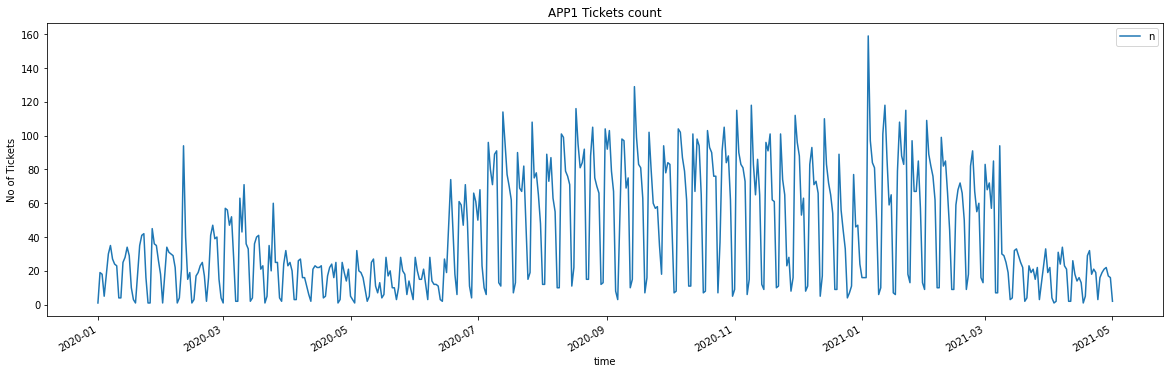

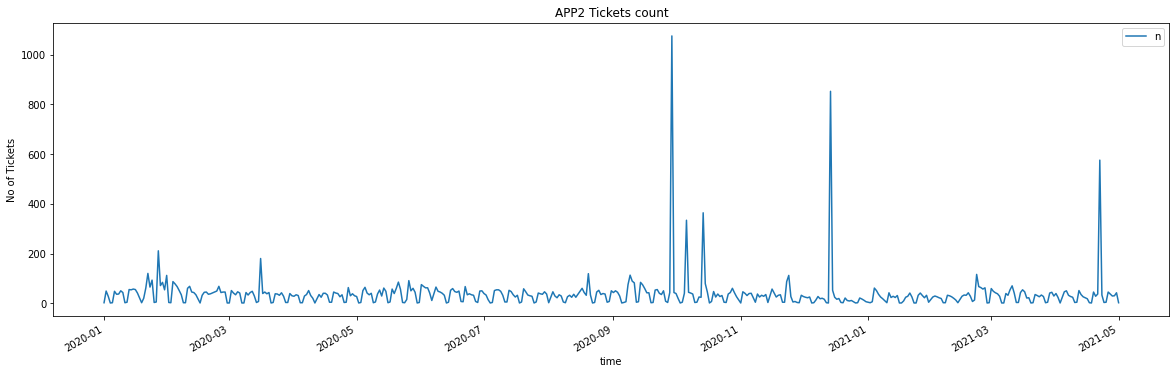

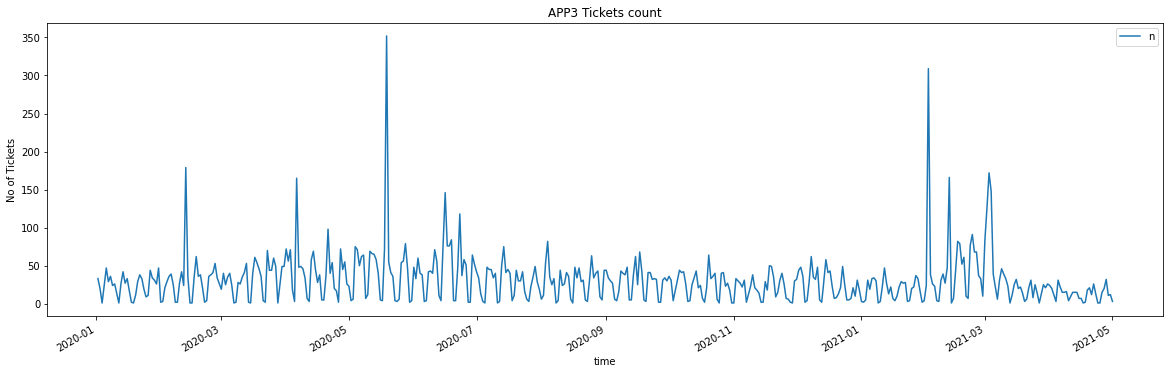

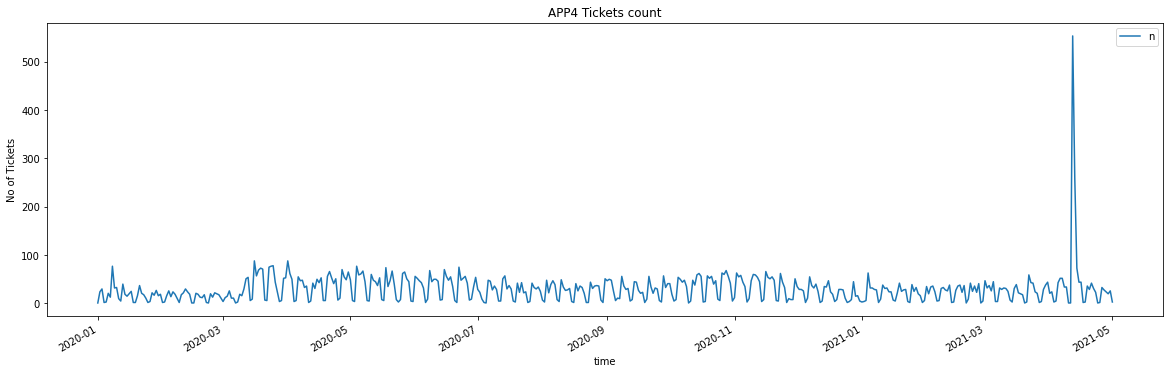

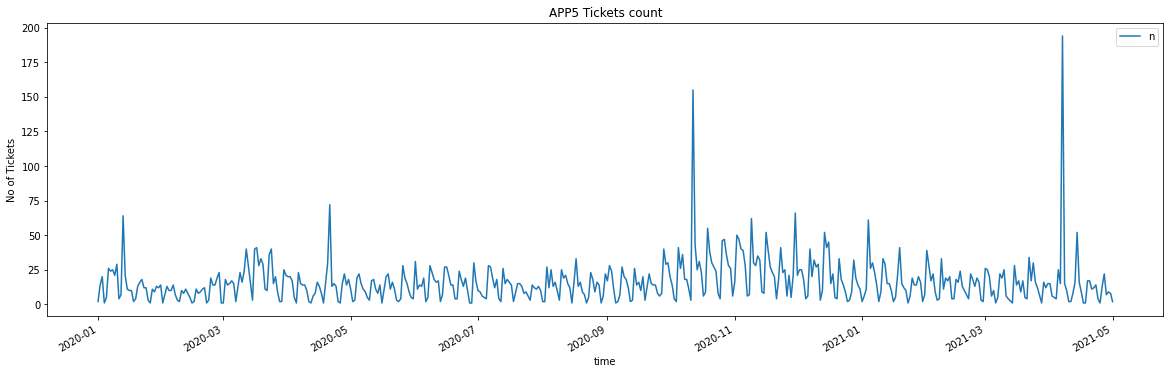

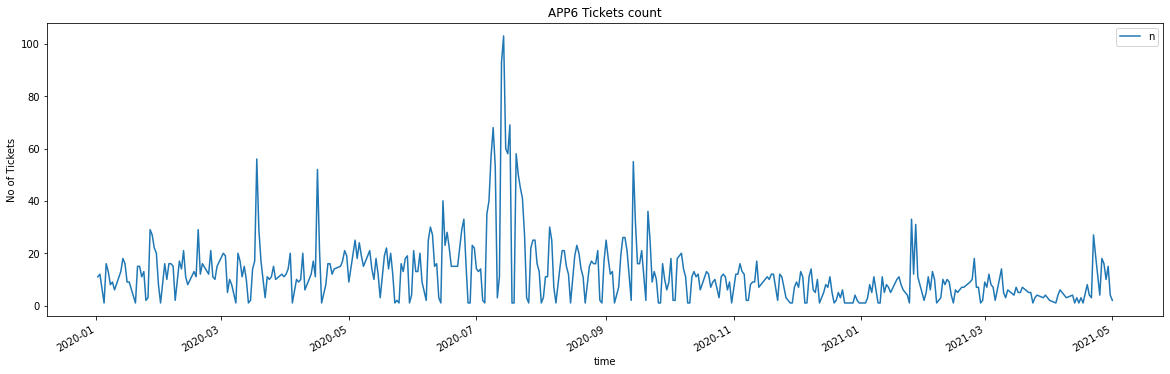

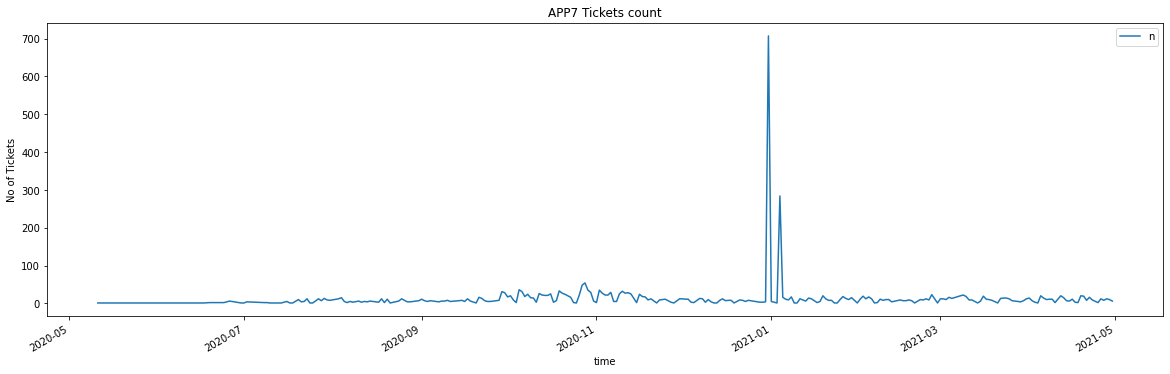

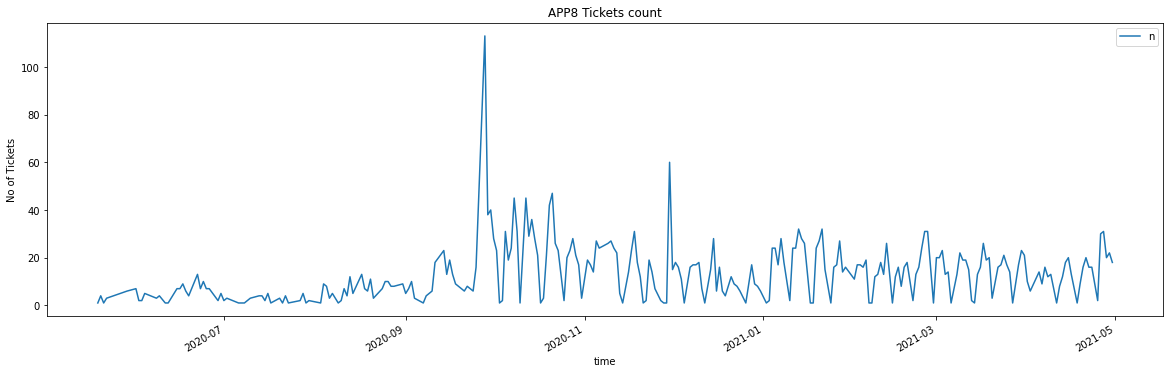

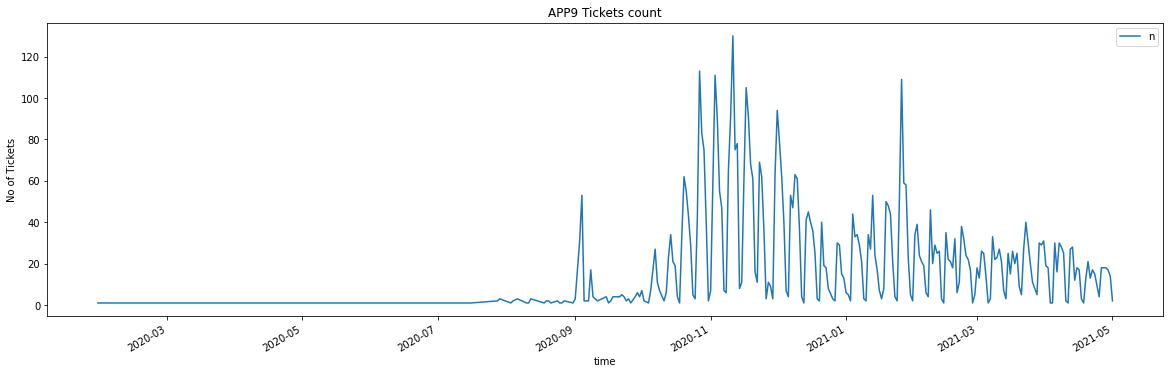

In [76]:
for i in apps:
    d[d.app==i].plot(x='time',y='n',figsize=(20,6))
    plt.title('{} Tickets count'.format(i))
    plt.ylabel('No of Tickets')

In [77]:
d['day']=d.time.dt.dayofweek
d

,time,app,n,day
0,2020-01-01,APP1,1,2
1,2020-01-01,APP2,2,2
2,2020-01-01,APP4,1,2
3,2020-01-01,APP5,2,2
4,2020-01-02,APP1,19,3
...,...,...,...,...
3600,2021-05-01,APP3,3,5
3601,2021-05-01,APP4,3,5
3602,2021-05-01,APP5,2,5
3603,2021-05-01,APP6,2,5


In [78]:
#'dw' have data of weekdays
dw=d[d.day<=4]
dw

,time,app,n,day
0,2020-01-01,APP1,1,2
1,2020-01-01,APP2,2,2
2,2020-01-01,APP4,1,2
3,2020-01-01,APP5,2,2
4,2020-01-02,APP1,19,3
...,...,...,...,...
3593,2021-04-30,APP5,8,4
3594,2021-04-30,APP6,4,4
3595,2021-04-30,APP7,6,4
3596,2021-04-30,APP8,18,4


In [79]:
#'de' have data of weekends
de=d[d.day>4]
de

,time,app,n,day
16,2020-01-04,APP1,5,5
17,2020-01-04,APP2,1,5
18,2020-01-04,APP3,1,5
19,2020-01-04,APP4,2,5
20,2020-01-04,APP5,1,5
...,...,...,...,...
3600,2021-05-01,APP3,3,5
3601,2021-05-01,APP4,3,5
3602,2021-05-01,APP5,2,5
3603,2021-05-01,APP6,2,5


## For Weekdays 

In [80]:
dict_qg={}
dict_uppg={}

for app in apps:
    #q is anomalies list
    #upp is upper bound list 
    q=[]
    upp=[]
    #here 10 days are taken as moving window since 2 weeks have 10 weekdays
    for i in range(dw[dw.app==app].shape[0]-10):
        tmp=list(dw[dw.app==app][i:i+10].n)
        q1 = np.percentile(tmp, 25)  
        q3 = np.percentile(tmp, 75)  
        iqr = q3 - q1
        #ub is upper bound  or threshold(q3+1.5IQR) for the window of 10 days(2 weeks)
        ub=q3+(1.5*iqr)
        upp.append(ub)

        #checking whether the last element or current element is below the upper bound if not it is added to anomaly list
        if tmp[9]>ub:
            q.append([dw[dw.app==app].time.iloc[i+9],tmp[9]])
    
    #appending the upper bound list for each app to the upperbound dict 
    dict_uppg[app]=list(dw[dw.app==app].n)[:10]+upp
    #appending the anomaly list for each app to the anomaly dict 
    dict_qg[app]=np.array(q).T
    print(app)
    for k in q:
        print('Date= {} and Anomaly count={}'.format(str(k[0])[:10],k[1]))
    print('-'*50)

APP1
Date= 2020-02-11 and Anomaly count=94
Date= 2020-03-25 and Anomaly count=60
Date= 2020-06-17 and Anomaly count=47
Date= 2020-06-18 and Anomaly count=74
Date= 2020-07-06 and Anomaly count=96
Date= 2020-11-02 and Anomaly count=115
Date= 2021-01-04 and Anomaly count=159
Date= 2021-03-30 and Anomaly count=33
Date= 2021-04-05 and Anomaly count=31
--------------------------------------------------
APP2
Date= 2020-01-22 and Anomaly count=120
Date= 2020-01-24 and Anomaly count=93
Date= 2020-01-27 and Anomaly count=211
Date= 2020-02-25 and Anomaly count=68
Date= 2020-03-16 and Anomaly count=180
Date= 2020-04-27 and Anomaly count=63
Date= 2020-05-26 and Anomaly count=91
Date= 2020-06-22 and Anomaly count=67
Date= 2020-08-17 and Anomaly count=60
Date= 2020-08-20 and Anomaly count=119
Date= 2020-09-08 and Anomaly count=75
Date= 2020-09-09 and Anomaly count=113
Date= 2020-09-29 and Anomaly count=1076
Date= 2020-10-06 and Anomaly count=334
Date= 2020-10-14 and Anomaly count=364
Date= 2020-11-16

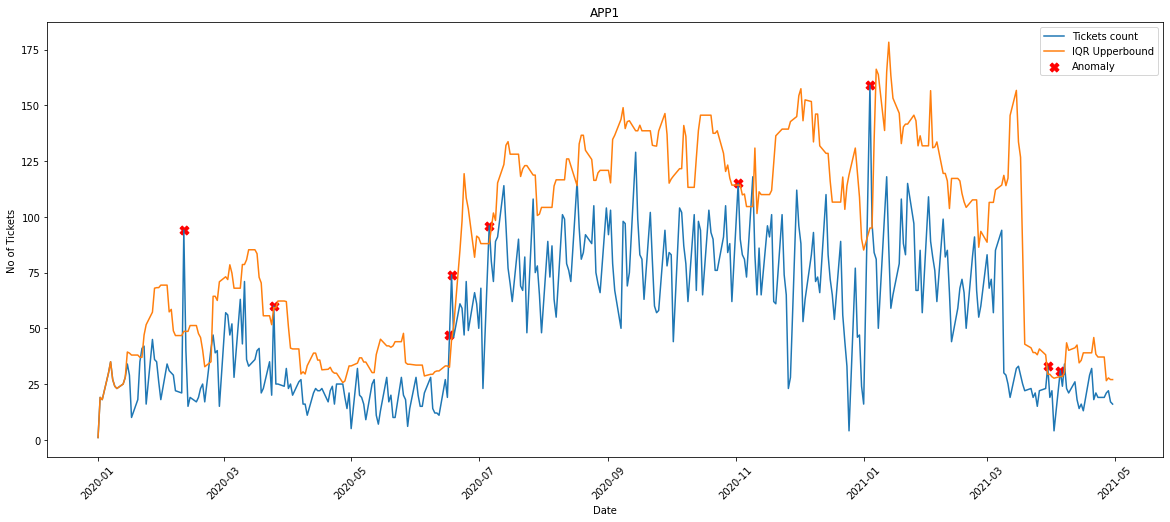

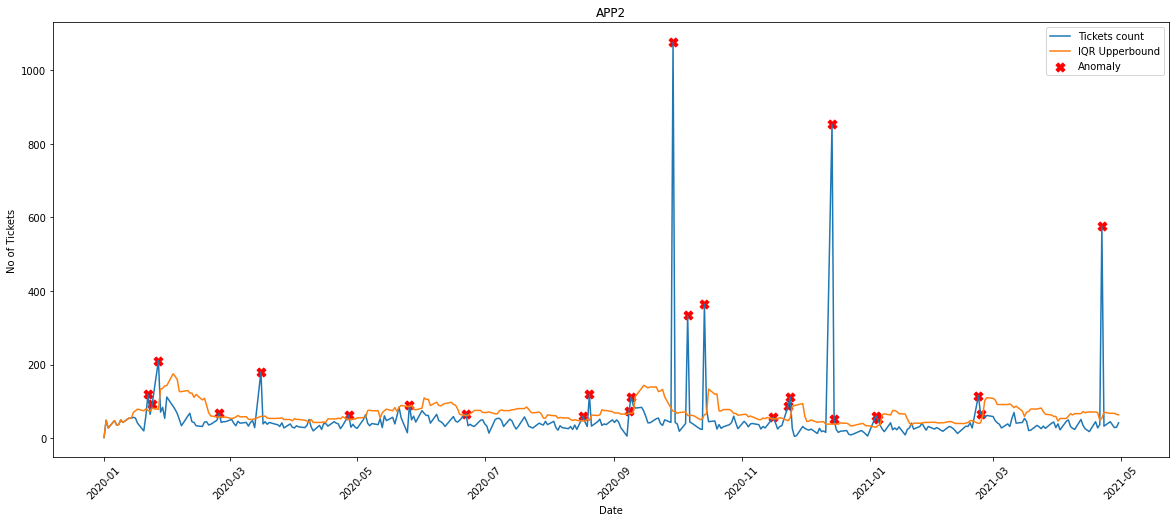

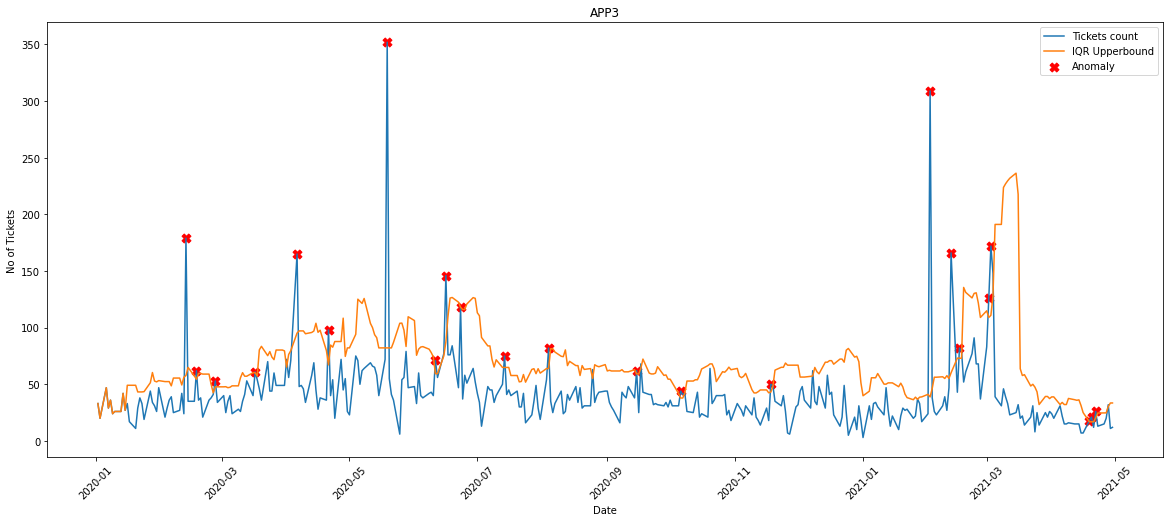

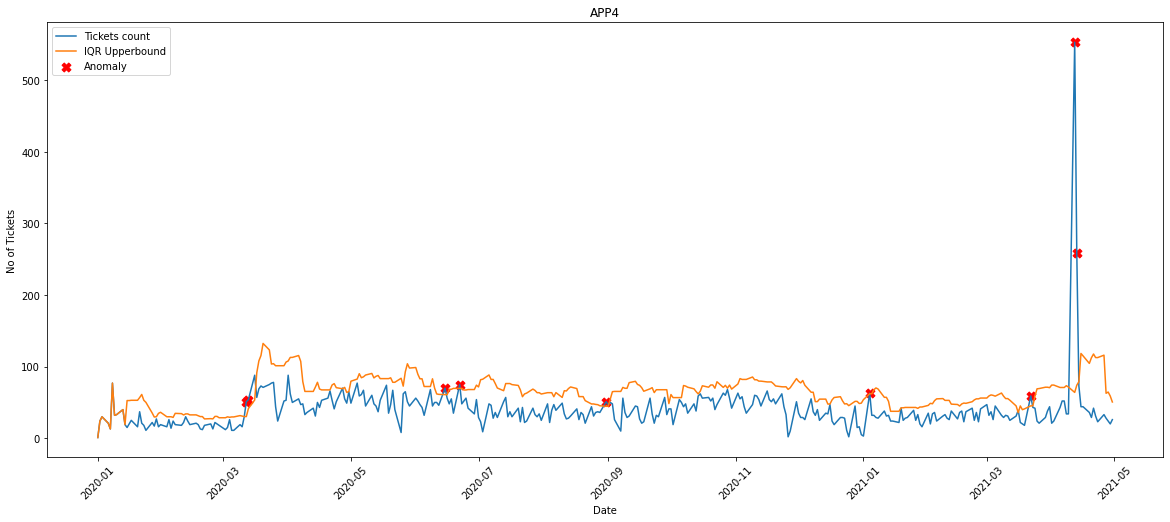

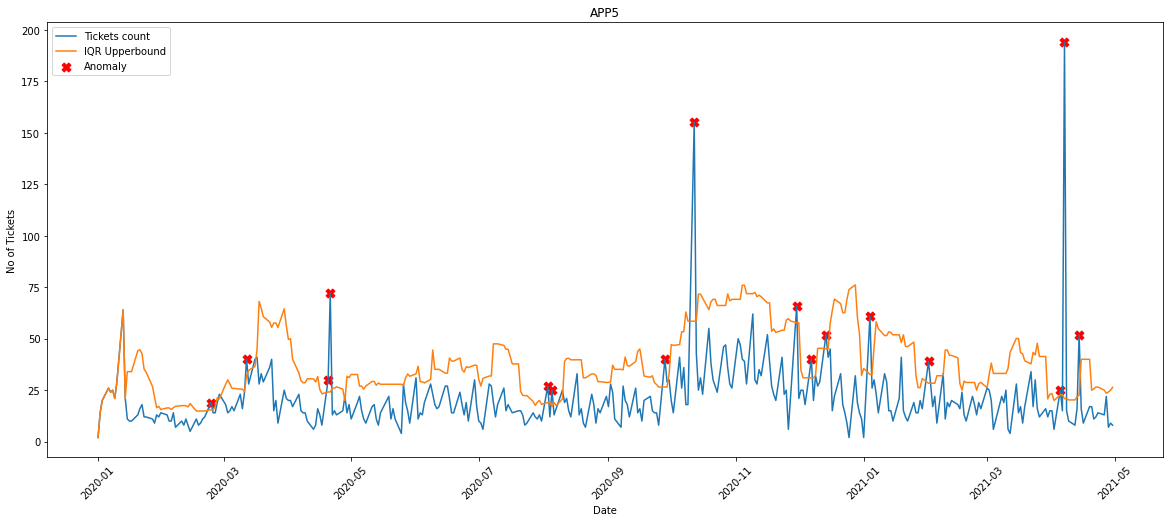

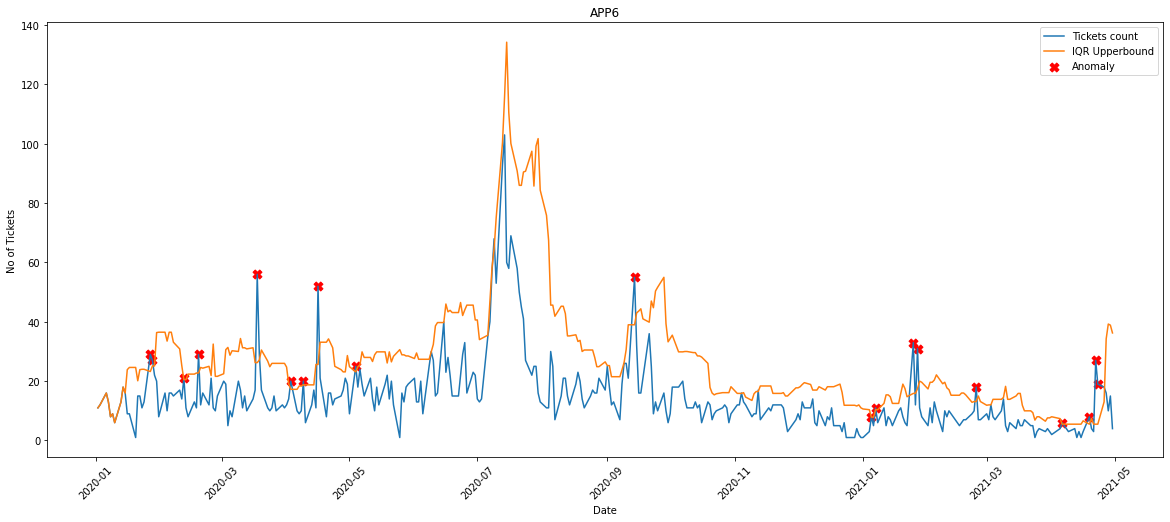

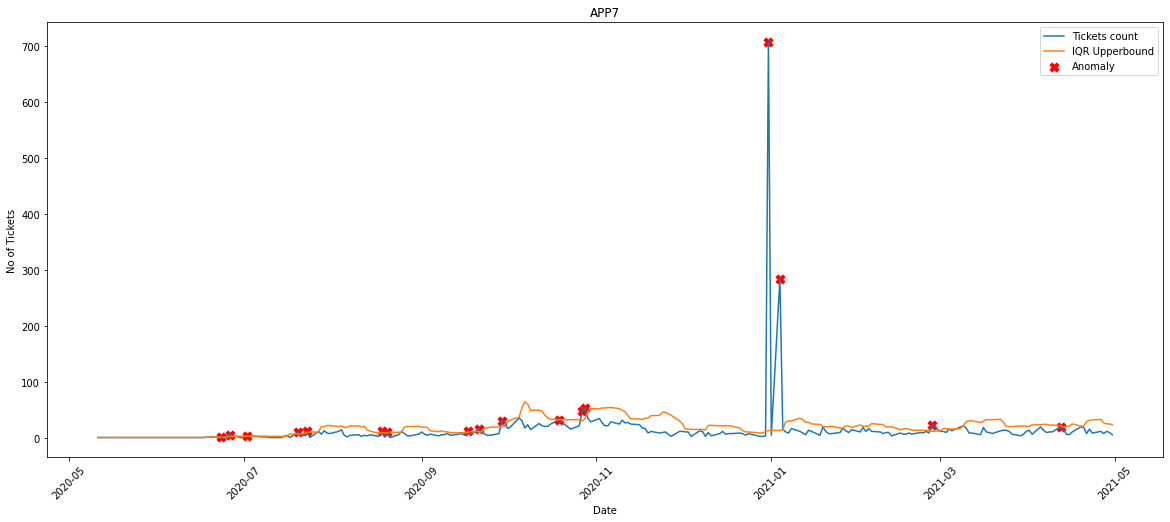

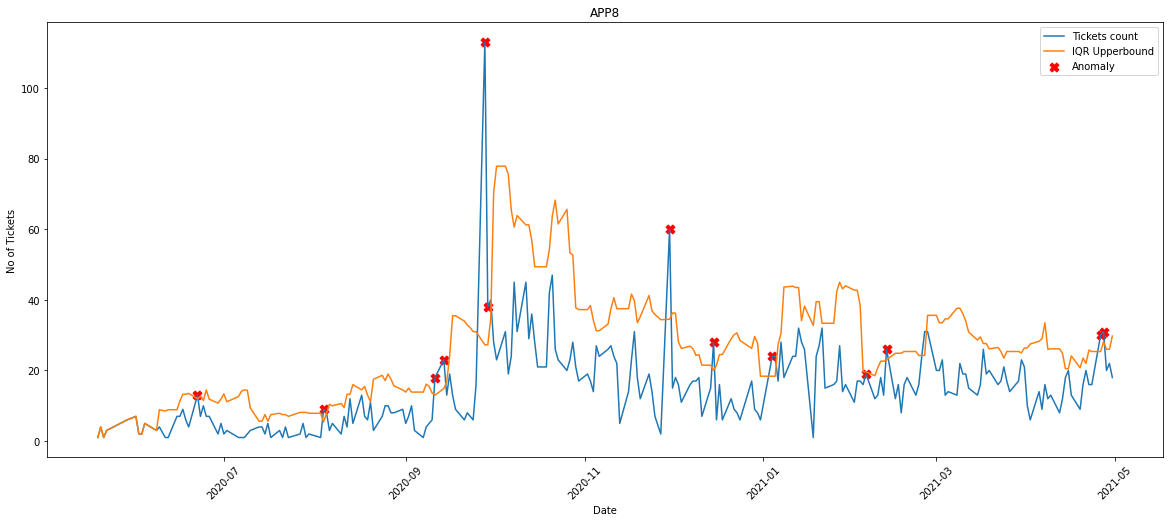

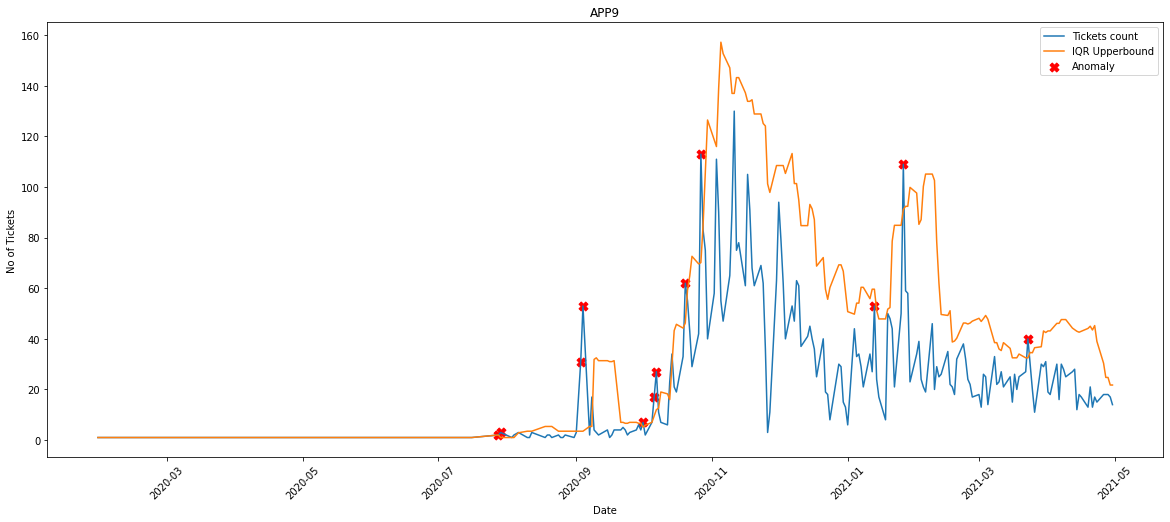

In [81]:
for app in apps:    
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=45)
    plt.plot(list(dw[dw.app==app].time),list(dw[dw.app==app].n),label='Tickets count')
    plt.plot(list(dw[dw.app==app].time),dict_uppg[app],label='IQR Upperbound')
    plt.scatter(dict_qg[app][0],dict_qg[app][1],s=80,marker='X',color='r',label='Anomaly')
    plt.ylabel('No of Tickets')
    plt.xlabel('Date')
    plt.title(app)
    plt.legend()


## For weekends

In [82]:
dict_qge={}
dict_uppge={}

for app in apps:
    #qe is anomalies list for weekend
    #uppe is upper bound list
    qe=[]
    uppe=[]
    #here 4 days are taken as moving window since 2 weeks have 4 weekends
    for i in range(de[de.app==app].shape[0]-4):
        tmp=list(de[de.app==app][i:i+4].n)
        q1 = np.percentile(tmp, 25)  
        q3 = np.percentile(tmp, 75)  
        iqr = q3 - q1
        #ub is upper bound or threshold(q3+1.5IQR) for the window of 4 days(2 weeks)
        ub=q3+(1.5*iqr)
        uppe.append(ub)

        #checking whether the last element or current element is below the upper bound if not it is added to anomaly list
        if tmp[3]>ub:
            qe.append([de[de.app==app].time.iloc[i+3],tmp[3]])
    
    #appending the upper bound list for each app to the upperbound weekend dict 
    dict_uppge[app]=list(de[de.app==app].n)[:4]+uppe
    #appending the anomaly list for each app to the anomaly weekend dict 
    dict_qge[app]=np.array(qe).T
    print(app)
    for k in qe:
        print('Date= {} and Anomaly count={}'.format(str(k[0])[:10],k[1]))
    print('-'*50)


APP1
Date= 2020-02-09 and Anomaly count=4
Date= 2020-02-23 and Anomaly count=16
Date= 2020-03-15 and Anomaly count=4
Date= 2020-04-11 and Anomaly count=6
Date= 2020-06-20 and Anomaly count=18
Date= 2020-08-16 and Anomaly count=22
Date= 2020-09-26 and Anomaly count=35
Date= 2020-10-25 and Anomaly count=37
Date= 2021-02-21 and Anomaly count=18
Date= 2021-03-28 and Anomaly count=13
Date= 2021-04-18 and Anomaly count=5
Date= 2021-04-25 and Anomaly count=16
--------------------------------------------------
APP2
Date= 2020-01-12 and Anomaly count=4
Date= 2020-03-14 and Anomaly count=3
Date= 2020-04-18 and Anomaly count=4
Date= 2020-06-06 and Anomaly count=11
Date= 2021-01-03 and Anomaly count=6
Date= 2021-01-30 and Anomaly count=4
Date= 2021-02-20 and Anomaly count=7
Date= 2021-03-28 and Anomaly count=4
--------------------------------------------------
APP3
Date= 2020-01-25 and Anomaly count=9
Date= 2020-03-01 and Anomaly count=19
Date= 2020-03-21 and Anomaly count=4
Date= 2020-04-04 and A

IndexError: index 0 is out of bounds for axis 0 with size 0

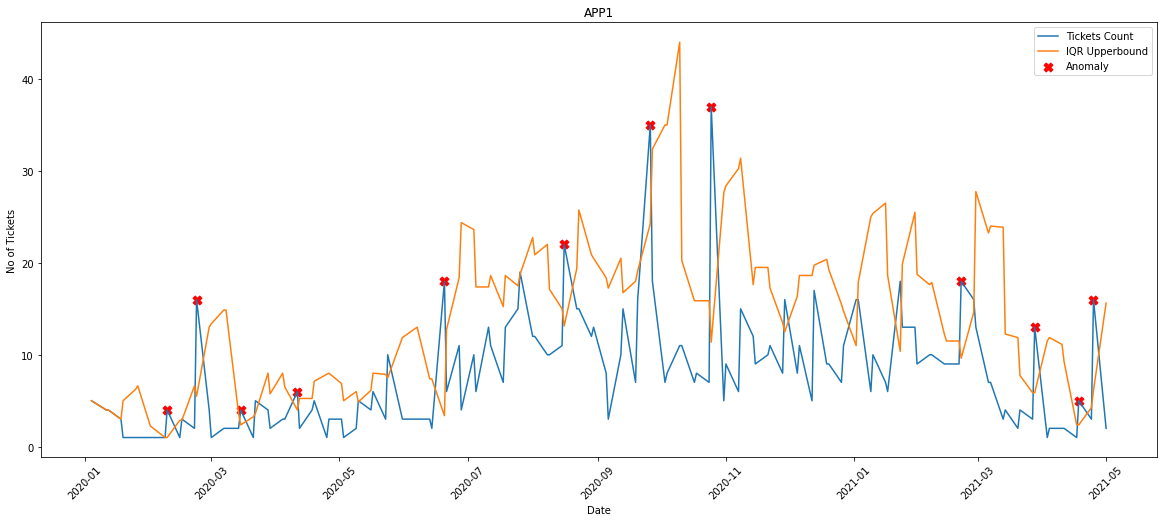

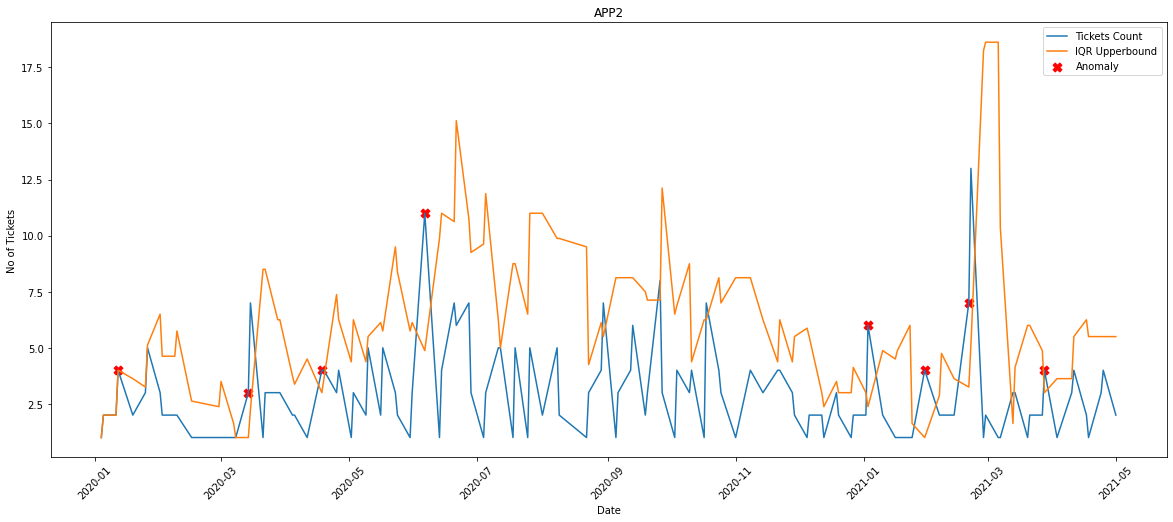

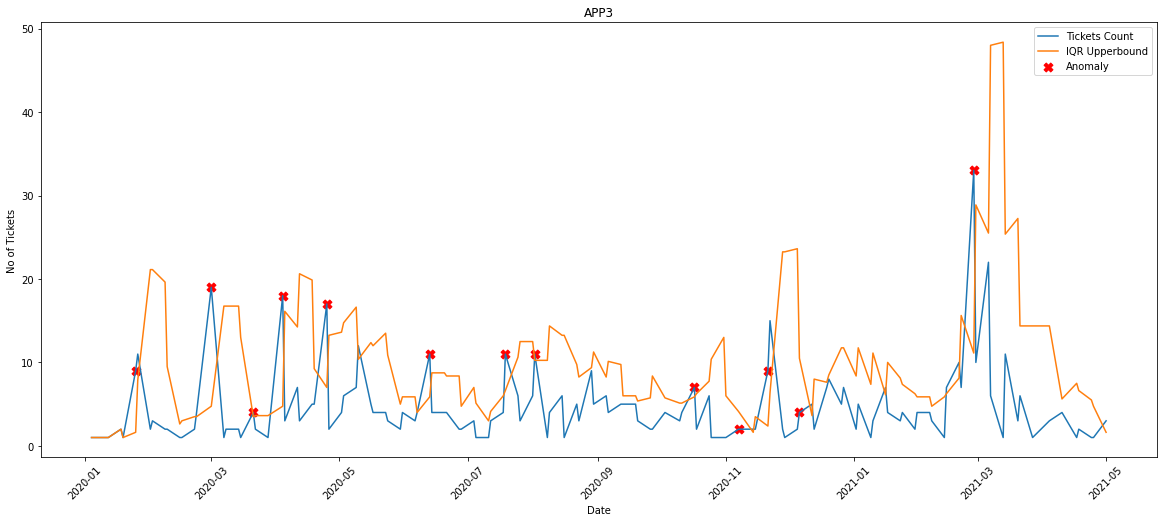

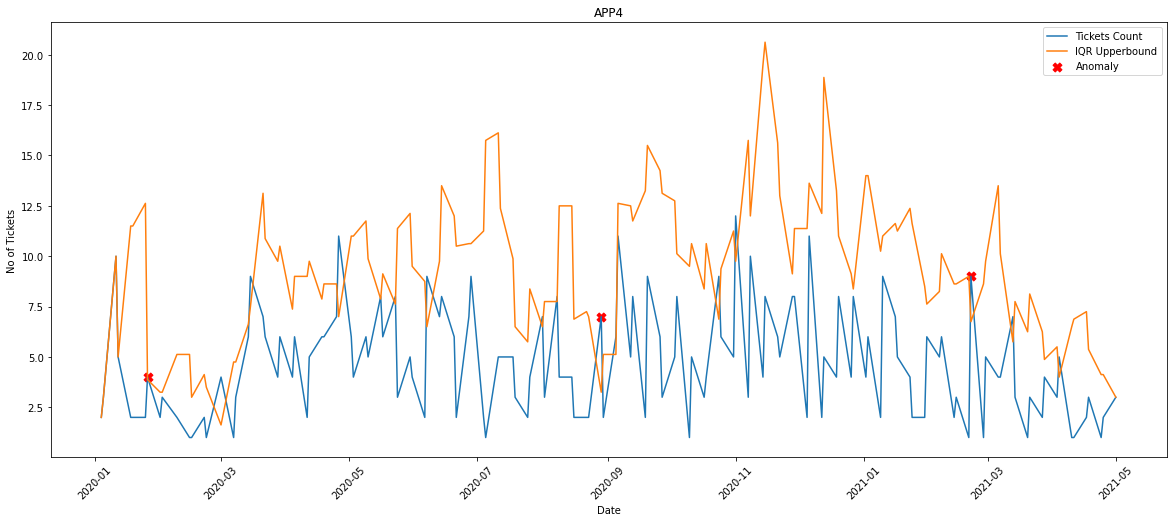

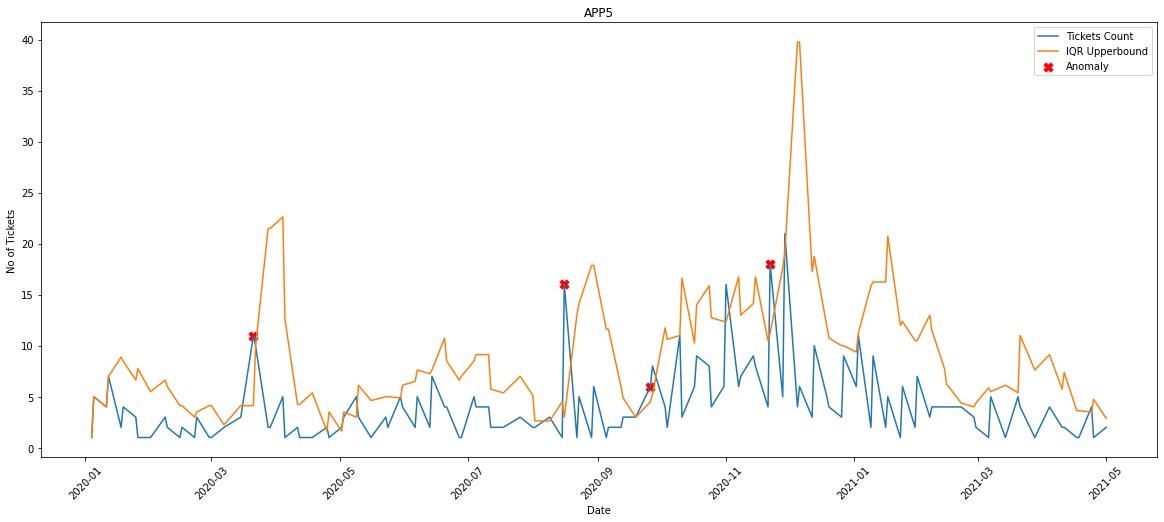

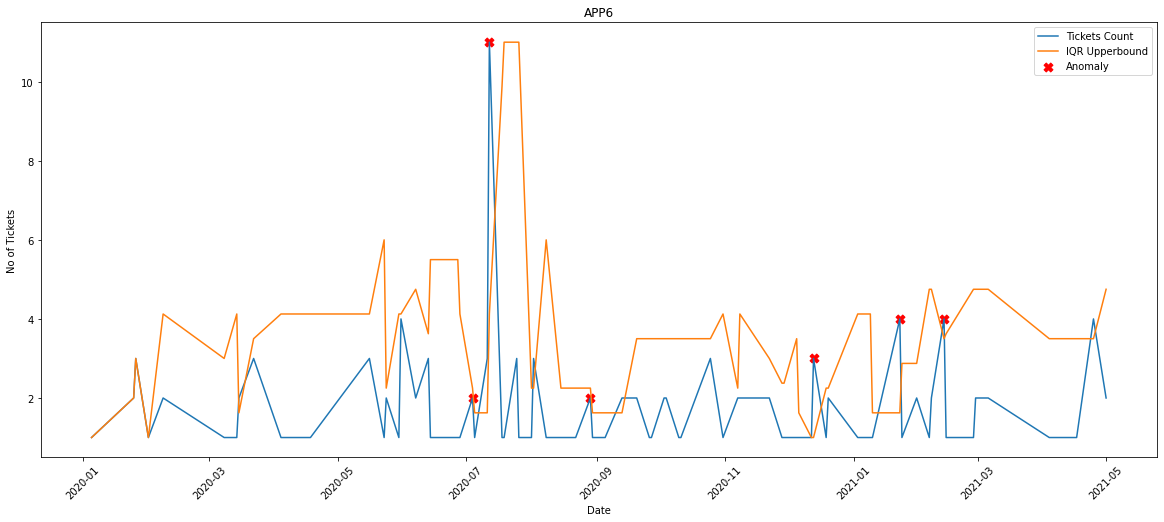

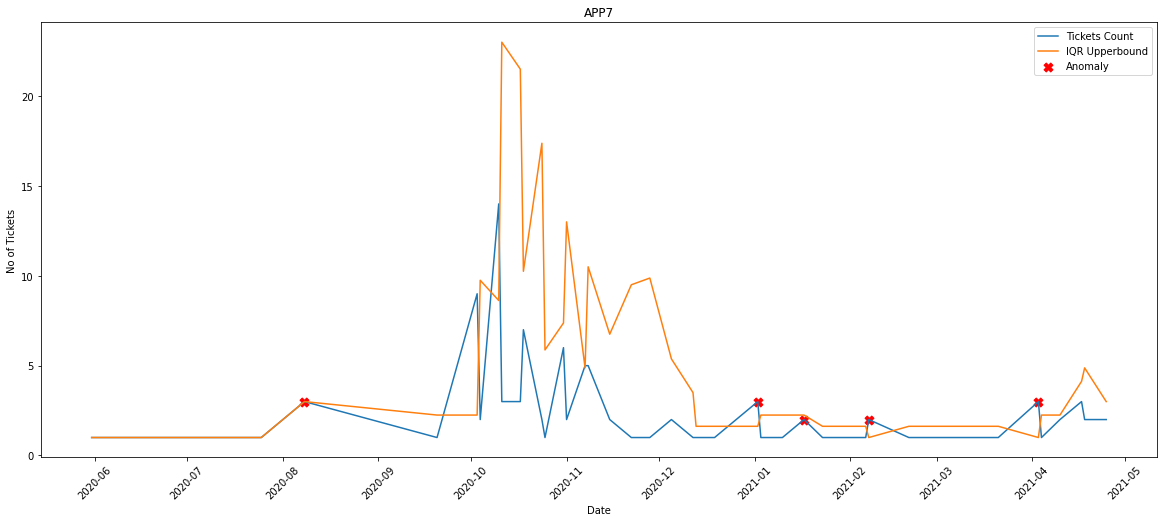

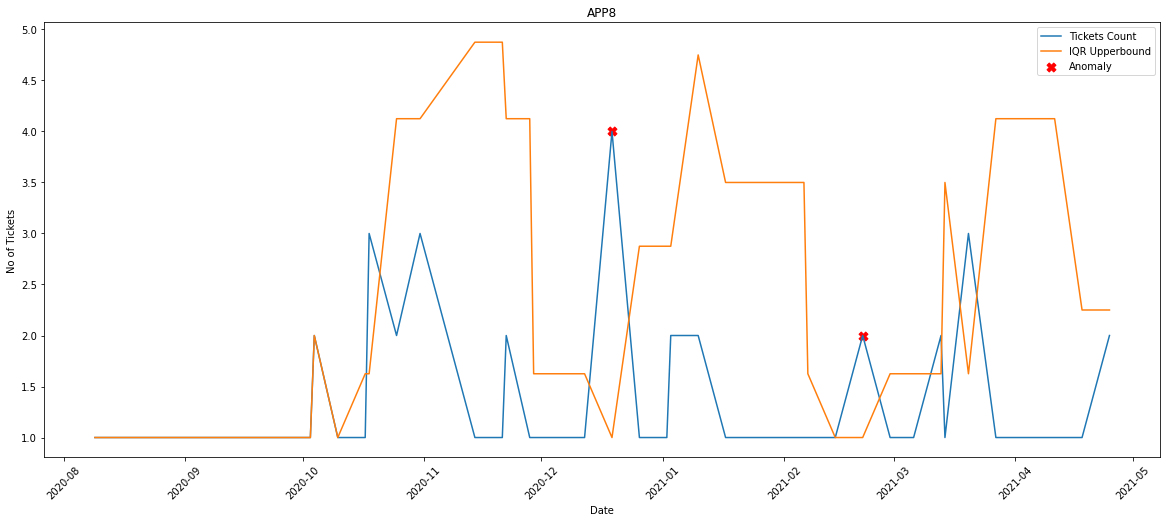

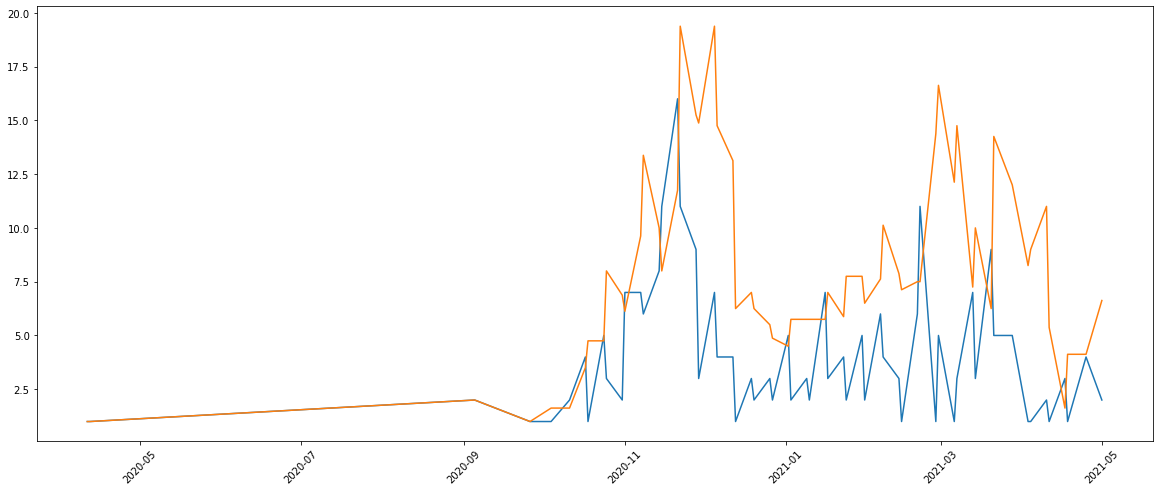

In [83]:
for app in apps:    
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=45)
    plt.plot(list(de[de.app==app].time),list(de[de.app==app].n),label='Tickets Count')
    plt.plot(list(de[de.app==app].time),dict_uppge[app],label='IQR Upperbound')
    plt.scatter(dict_qge[app][0],dict_qge[app][1],s=80,marker='X',color='r',label='Anomaly')
    plt.title(app)
    plt.ylabel('No of Tickets')
    plt.xlabel('Date')
    plt.legend()
#getting an error since 'APP9' dont have Anomalies for Weekend

In [ ]:
#d[d.app=='APP7'].iloc[150:200]

In [49]:
#d[d.app=='APP9'].tail(60)